# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [7]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

I have set n_estimators to 1000, which means my random forest model will be comprised of 1000 individual decision trees. It's worth noting that there are numerous other parameters within the random forest algorithm that can be fine-tuned for optimal performance. However, finding the ideal combination of these parameters often requires a manual process of exploration and trial and error, which is beyond the scope of this notebook.

### Evaluation

we'll assess the performance of our trained model in predicting the values of the test dataset. To do this, we'll employ three key metrics:

- <b>Accuracy</b>: The proportion of correctly predicted observations to the total number of observations.
- <b>Precision</b>: The model's ability to avoid misclassifying negative samples as positive.
- <b>Recall</b>: The model's ability to identify all positive samples.

We're using these three metrics because accuracy alone can be misleading. For instance, consider a scenario where we're predicting heart failures in a hospital. Suppose we correctly predict 80 out of 100 patients who actually experienced heart failure (80% accuracy). While this may seem like a good result, it also means we incorrectly predicted 20 patients, which could have severe consequences, such as delayed treatment.

Furthermore, predicting negative cases as positive (false positives) can lead to wasted resources and time, which could be better spent on actual heart failure patients. This example highlights the importance of considering additional performance metrics like Precision and Recall, which are particularly useful in classification scenarios.

In [8]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [9]:
y_test.value_counts()

churn
0    3286
1     366
Name: count, dtype: int64

In [10]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 18
False positives: 3
True negatives: 3283
False negatives: 348

Accuracy: 0.9038882803943045
Precision: 0.8571428571428571
Recall: 0.04918032786885246


- In the test set, approximately 10% of the rows are churners (`churn = 1`).
- For true negatives, we correctly identified 3283 out of 3286 negative cases (`churn = 0`), which is excellent.
- Regarding false negatives, where we predicted a client would not churn (`churn = 0`) when they actually did (`churn = 1`), the number is quite high at 347. Reducing this number is crucial for improving the model.
- For false positives, where we predicted a client would churn when they actually did not, we have only 3 cases, which is great!
- The number of true positives, where we correctly identified clients that churned, is 19 out of 366. This indicates a significant issue, as the model is failing to identify a large portion of churners.
- The accuracy score is misleading. While it may appear high, it does not reflect the model's performance accurately, which is why precision and recall are important metrics to consider.
- The precision score is 0.86, which is decent but could be improved.
- The recall score indicates that the classifier has poor ability to identify positive samples (churners). Improving recall should be a priority.

Overall, the model excels at identifying clients who do not churn but struggles with predicting clients who do churn. This suggests that the current features are not sufficiently distinguishing between churners and non-churners.

### Model Understanding

A simple way to understand the results of a model is to examine feature importances. Feature importances indicate how important a feature is within the predictive model. There are various methods to calculate feature importance, but with the Random Forest classifier, we can use its built-in method to extract this information from the trained model. In the Random Forest case, feature importance reflects how frequently each feature is used for splitting across all trees.

---

In [11]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


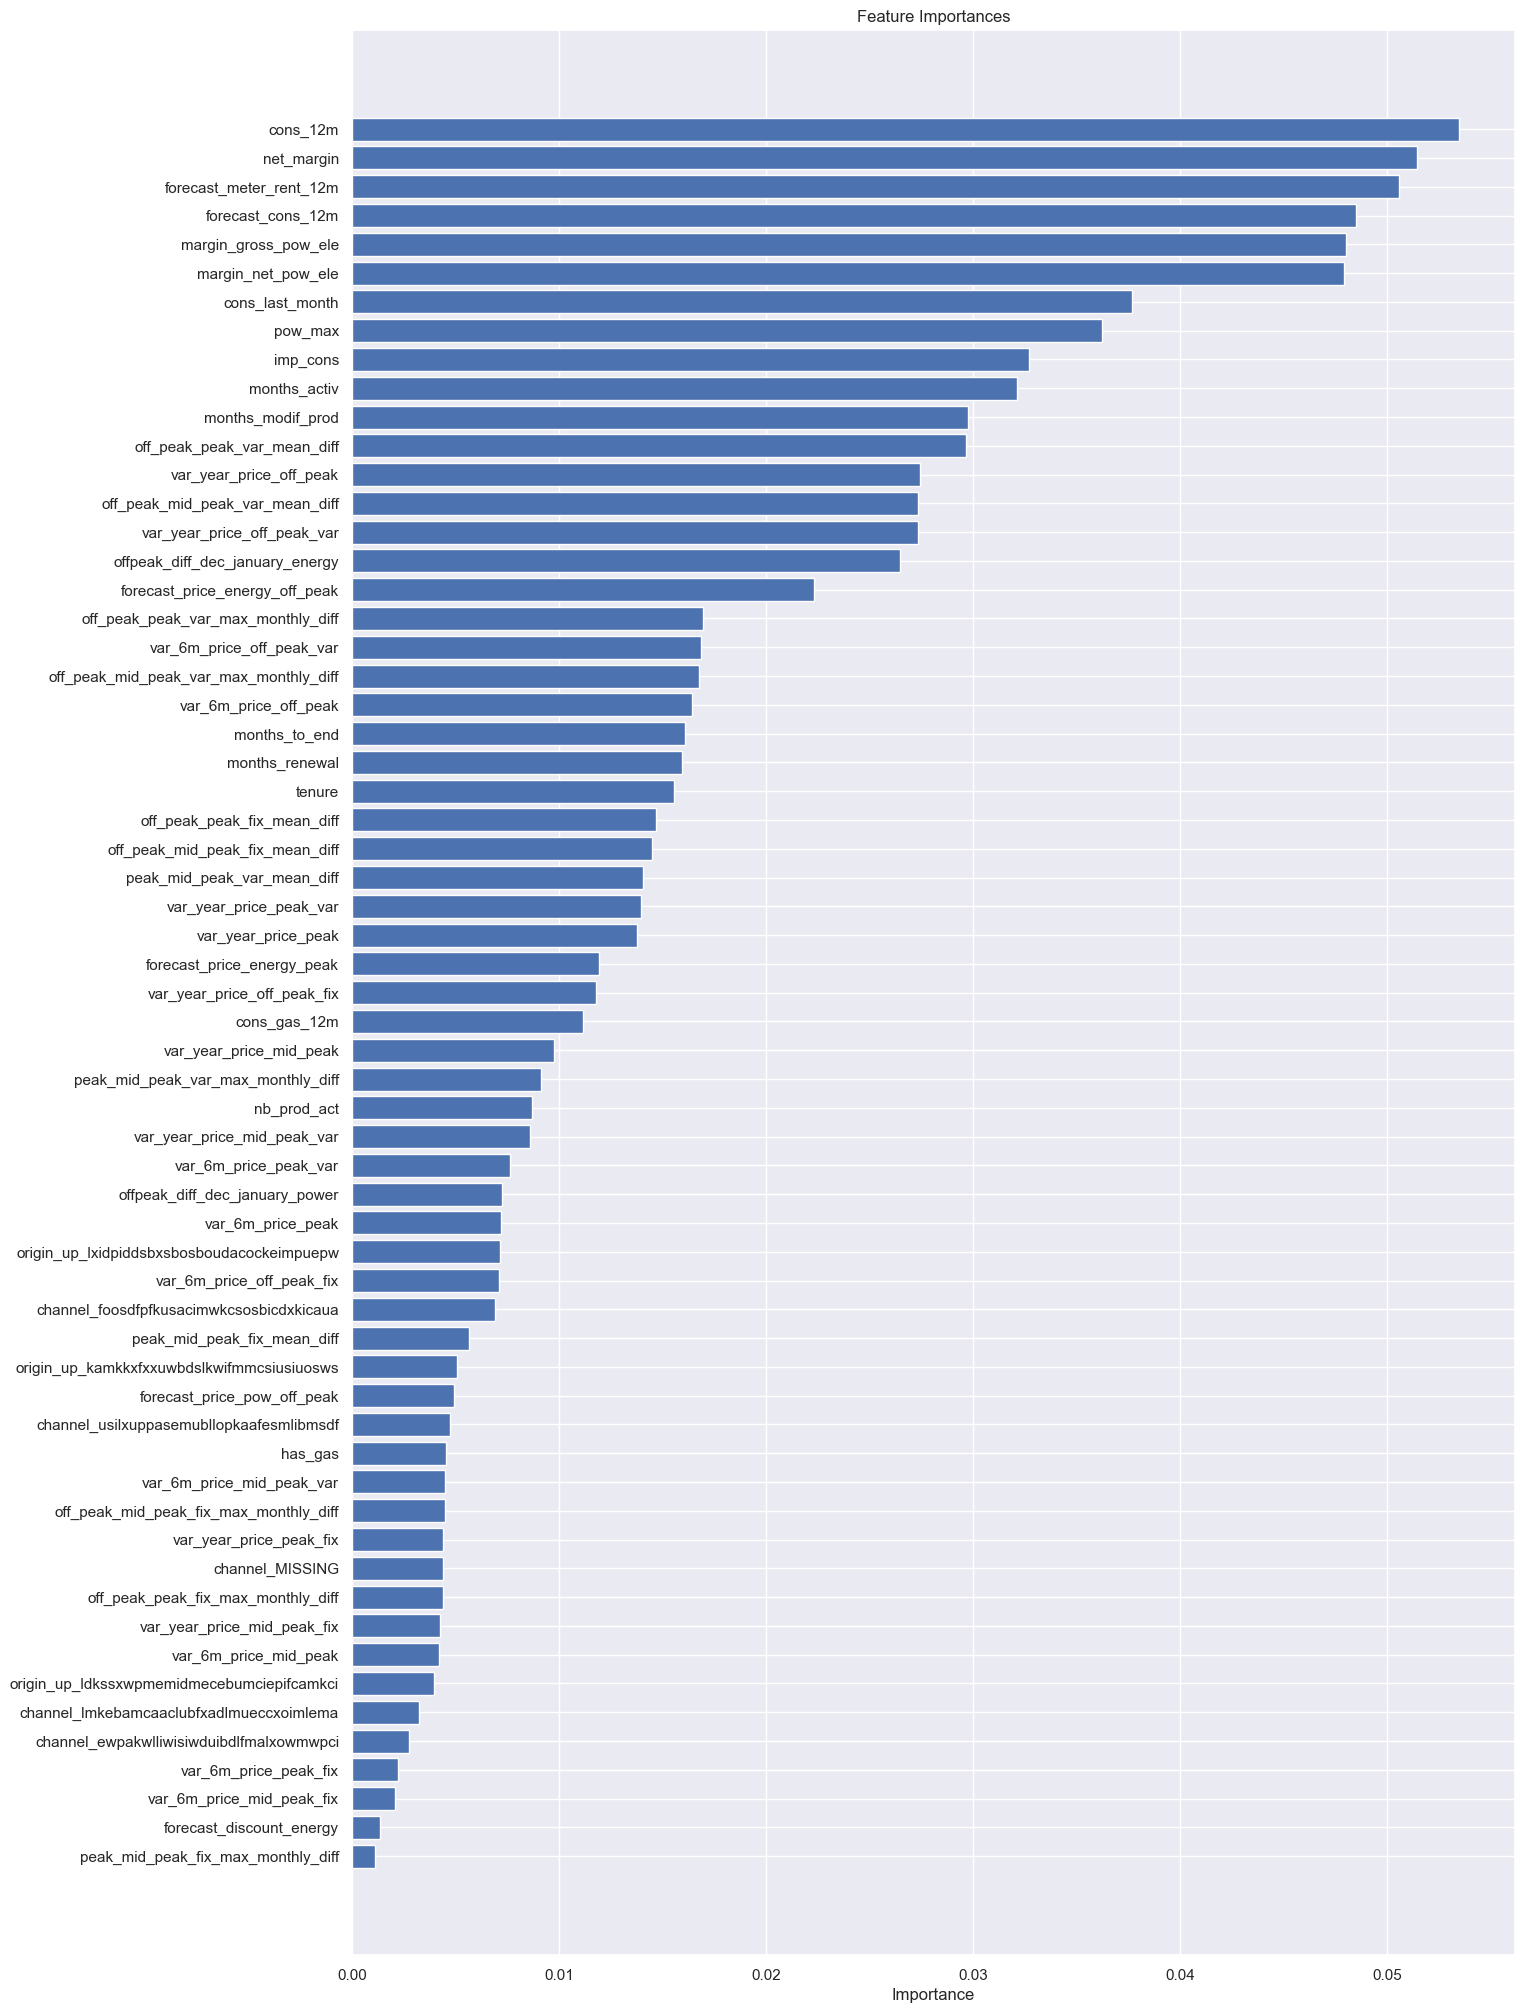

In [12]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()


From this chart, we can observe the following points:

- **Net margin and consumption over 12 months** are major drivers of churn in this model.
- **Margin on power subscription** is also a significant driver.
- **Time-related factors** are influential, including the number of months a customer has been active, their tenure, and the number of months since they updated their contract.
- The feature recommended by our colleague is among the top half in terms of influence, and some features derived from it actually outperform it.
- **Price sensitivity features** are scattered and not the primary driver for customer churn.

The last observation is particularly important as it relates to our original hypothesis:

> **Is churn driven by the customers' price sensitivity?**

According to the feature importance results, price sensitivity is not a main driver of churn but rather a weak contributor. However, further experimentation is required to reach a definitive conclusion.


In [13]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [14]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [15]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

 creating new features based on insights from the existing data

In [ ]:
# Feature Engineering
# Calculate the duration in months since the customer started
df['customer_age'] = df['current_month'] - df['start_month']

# Calculate the duration in months since the last contract update
df['contract_age'] = df['current_month'] - df['last_update_month']

# Calculate the total duration of activity
df['activity_duration'] = df['current_month'] - df['start_month']

# Interaction Features
df['margin_to_consumption_ratio'] = df['net_margin'] / (df['consumption'] + 1e-6)  # Add a small constant to avoid division by zero
df['tenure_margin_interaction'] = df['activity_duration'] * df['net_margin']

# Rolling Aggregates
df['avg_consumption_3m'] = df['consumption'].rolling(window=3).mean().fillna(df['consumption'])
df['avg_margin_3m'] = df['net_margin'].rolling(window=3).mean().fillna(df['net_margin'])

# Recent Activity
df['months_since_last_activity'] = df['current_month'] - df['last_activity_month']

# Frequency of Updates
df['contract_updates_last_year'] = df['contract_updates_last_year'].fillna(0)  # Assuming this data is available

# Price Sensitivity Features
df['price_change'] = df['current_price'] - df['previous_price']
df['price_sensitivity_index'] = df['price_change'] / df['previous_price']

